# Soal 10

1. [Buat multiple regression untuk memprediksi Sales dengan prediktor Price, Urban, dan US](#1)
2. [Interpretasikan tiap koefisien di model tersebut](#2)
3. [Tulis model tersebut dalam bentuk persamaan](#3)
4. [Prediktor apa yang menolak null hypothesis](#4)
5. [Buatlah model yang lebih bagus dari model 1 sesuai hasil dari model sebelumnya](#5)
6. [Seberapa bagus model 1 dan model 2](#6)
7. [Dengan menggunakan model 2, tentukan nilai 95% confidence intervalnya](#7)
8. [Apakah ada outlier atau high leverage observations](#8)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

## 1

In [5]:
carseats = pd.read_csv('dataset/Carseats.csv', index_col=0)

In [6]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [7]:
carseats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 11 columns):
Sales          400 non-null float64
CompPrice      400 non-null int64
Income         400 non-null int64
Advertising    400 non-null int64
Population     400 non-null int64
Price          400 non-null int64
ShelveLoc      400 non-null object
Age            400 non-null int64
Education      400 non-null int64
Urban          400 non-null object
US             400 non-null object
dtypes: float64(1), int64(7), object(3)
memory usage: 37.5+ KB


In [8]:
carseats.shape

(400, 11)

In [15]:
# dengan statsmodel
model_1 = smf.ols(formula='Sales ~ Price + Urban + US', data=carseats).fit()

In [16]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           2.39e-23
Time:                        17:00:47   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[kembali ke atas](#Soal-10)

## 2

Dari hasil di atas, Urban(T.Yes) tidak memiliki hubungan dengan Sales. Price memiliki hubungan yang negatif (Price naik, Sales Turun). Sebaliknya, US memiliki hubungan positif. Jika berada di US, maka Sales akan naik.

[kembali ke atas](#Soal-10)

## 3

$Sales = 13.0435 - 0.0219 \times Urban + 1.2006 \times US - 0.0545 \times Price$

Perlu diperhatikan bahwa prediktor Urban dan US adalah qualitative predictor sehingga nilainya hanya antara 0 atau 1

[kembali ke atas](#Soal-10)

## 4

Predictor yang menolak null hypothesis ialah prediktor yang memiliki nilai p-value lebih kecil dari 0.05.

Prediktor yang memenuhi syarat ini hanya US dan Price

[kembali ke atas](#Soal-10)

## 5

Dari hasil sebelumnya, prediktor yang memiliki hubungan kuat dengan response hanya Price dan US.

In [13]:
model_2 = smf.ols(formula='Sales ~ Price + US', data=carseats).fit()

In [17]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           2.66e-24
Time:                        17:00:53   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[kembali ke atas](#Soal-10)

## 6

Untuk melihat model yang mana lebih bagus, kita dapat mengecek nilai $R^2$nya karena $R^2$ menunjukkan seberapa besar variansi yang dapat dijelaskan oleh prediktor prediktor tersebut. 

Dari model 1 dan 2, keduanya memiliki nilai $R^2$ yang sama. Sehingga model ini keduanya mirip. Nilai $R^2$ yang kecil di kedua model (0.239) memperlihatkan bahwa kedua model ini belum terlalu bagus.

Namun, jika kita ingin tetap memilih model yang mana lebih bagus, maka model kedua lebih bagus karena memiliki $R^2$ yang sama dengan model 1 namun memiliki prediktor yang lebih sedikit

[kembali ke atas](#Soal-10)

## 7

In [18]:
model_1.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.763597,14.323341
Urban[T.Yes],-0.555973,0.512141
US[T.Yes],0.691304,1.709841
Price,-0.064764,-0.044154


In [19]:
model_2.conf_int(alpha=0.05, cols=None)

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


[kembali ke atas](#Soal-10)

## 8

In [20]:
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import ProbPlot

plt.style.use('seaborn') # pretty matplotlib plots
plt.rc('font', size=14)
plt.rc('figure', titlesize=18)
plt.rc('axes', labelsize=15)
plt.rc('axes', titlesize=18)

model_f = 'Sales ~ Price + US'

carseats.reset_index(drop=True, inplace=True)

model = smf.ols(formula=model_f, data=carseats)

model_fit = model.fit()

# fitted values (need a constant term for intercept)
model_fitted_y = model_fit.fittedvalues

# model residuals
model_residuals = model_fit.resid

# normalized residuals
model_norm_residuals = model_fit.get_influence().resid_studentized_internal

# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# absolute residuals
model_abs_resid = np.abs(model_residuals)

# leverage, from statsmodels internals
model_leverage = model_fit.get_influence().hat_matrix_diag

# cook's distance, from statsmodels internals
model_cooks = model_fit.get_influence().cooks_distance[0]

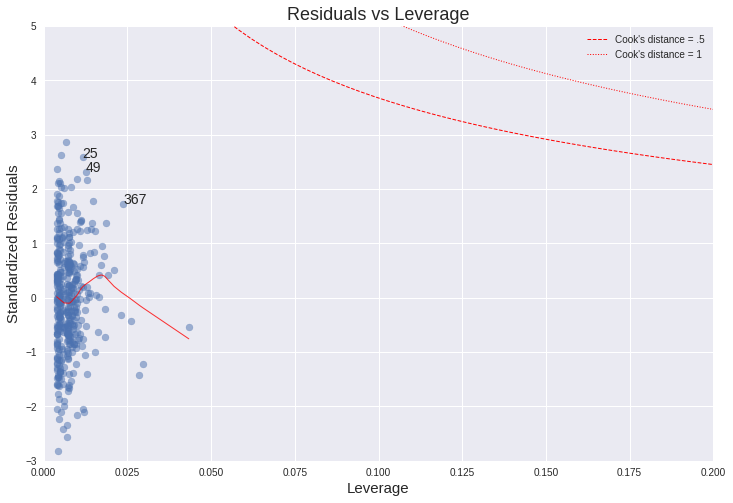

In [21]:
plot_lm_4 = plt.figure(4)
plot_lm_4.set_figheight(8)
plot_lm_4.set_figwidth(12)

plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
sns.regplot(model_leverage, model_norm_residuals, 
            scatter=False, 
            ci=False, 
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

plot_lm_4.axes[0].set_xlim(0, 0.20)
plot_lm_4.axes[0].set_ylim(-3, 5)
plot_lm_4.axes[0].set_title('Residuals vs Leverage')
plot_lm_4.axes[0].set_xlabel('Leverage')
plot_lm_4.axes[0].set_ylabel('Standardized Residuals')

# annotations
leverage_top_3 = np.flip(np.argsort(model_cooks), 0)[:3]

for i in leverage_top_3:
    plot_lm_4.axes[0].annotate(i, 
                               xy=(model_leverage[i], 
                                   model_norm_residuals[i]))

# shenanigans for cook's distance contours
def graph(formula, x_range, label=None, ls='-'):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls=ls, color='red')

p = len(model_fit.params) # number of model parameters

graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 
      'Cook\'s distance = .5', ls='--') # 0.5 line

graph(lambda x: np.sqrt((1 * p * (1 - x)) / x), 
      np.linspace(0.001, 0.200, 50), 'Cook\'s distance = 1', ls=':') # 1 line

plt.legend(loc='upper right');

Dari halaman 97 tentang outliers di buku ISLR, dikatakan bahwa nilai Studentized Residual itu bagusnya berada di antara -3 sampai 3. Dari penjelasan buku tersebut, dapat disimpulkan bahwa tidak ada outlier di model kedua

Dari halaman 98 tentang High Leverage Points, dikatakan bahwa average leverage untuk semua observasi ialah
$\frac{p + 1}{n}$. Jika nilainya lebih besar dari itu, maka kita bisa mencurigai bahwa titik tersebut memiliki nilai leverage yang tinggi

In [24]:
carseats.shape

(400, 11)

nilai leverage statisticnya = $3 / 400 = 0.0075$

Ada beberapa titik yang melebihi nilai 0.0075, titik-titik tersebut dapat dikatakan memiliki nilai leverage yang tinggi

[kembali ke atas](#Soal-10)